<a id='intro'></a>
## INTRODUCTION
> These data which are going to be anlyzed are about movies with large no. of features and records. There are diferent features describing the movie like popularity score, title,  genre, date, vote-score, .... etc. 9000+ Movies Dataset.
#### Variables:
> it Contains small no of variables like the main dataframe holding the movies which is "movies_df", and there other variables helps with visualizations.
#### Main Features:
> popularity: Score measures the popularity of the movie

> title: Title of the movie

> genres: movie genres splitted by ","

> votescore: Score measures the score of the movie based on rating from users

> Release_Date: Date when the movie was released.

> Original_Language: Original language of the movies. Dubbed version is not considered to be original language.

## INTERESTING QUESTIONS & ASSUMPTIONS:

> **1-** What genre are the most in our dataset? [Genre Distribution over data]

> **2-** What kind of films got the highest vote-score? [No explicit assumptions to make, but it might be family movies]

> **3-** Tracking the movies release years, which year got the most movies in it? [It will be in the new generation of course, 2000s].

> **4-** Does the number of the films over the year are affected by the month? [It might be something between month 7 and 10].

> **5-** Which movies got the most number of views? [No explicit feature there to make that decision but we can handle it with popularity and vote count feature as an alternative.]

> **6-** Which language seems to be high-voted for movies?

#### We hopefully are  trying to answer these questions using data anlaysis process.

<a id='intro'></a>
## Importing Packages

In [37]:
# First step to import the related packages like pandas: working with dataframes and data, numpy: for any kind...
# of mathematical functions or something, matplotlib, and seaborn: for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings(action='ignore') # To ignore warnings for better view

In [38]:
#Reading the data in csv (comma-seperated values) extension
movies_df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [39]:
# Previening the data for better intutions
movies_df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


### Preview Data Types and null Values

In [40]:
# Informations of each column like datatype and no. non-null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
Release_Date         9827 non-null object
Title                9827 non-null object
Overview             9827 non-null object
Popularity           9827 non-null float64
Vote_Count           9827 non-null int64
Vote_Average         9827 non-null float64
Original_Language    9827 non-null object
Genre                9827 non-null object
Poster_Url           9827 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 691.0+ KB


- From the above dataframe for info function, we didnt found any columns to drop with too much null values as the dataset seems to be very neat and clean, but we gonna drop some of them are out of our interest in this analysis like 'Overview', 'Poster_Url'. for the object release-date, it have to be turned into datetime datetype.

<a id='Questions'></a>
## Questions Stated

> **1-** What genre are the most in our dataset? 

> **2-** What kind of films got the highest vote-score? 

> **3-** Tracking the movies release years, which year got the most movies in it? 

> **4-** Does the number of the films over the year are affected by the month? 

> **5-** Which movies got the most number of views? 

> **6-** Which language seems to be high-voted for movies?


## Data Wrangling
 - For our Data we will drop 'Overview', 'Poster_Url' as they are not useful for our questions stated above.
 - For problems with data types we found only one problem with release_date which have to be converted datetime datatype rather than object. Then we will rename that column to be release_month instead of release_date as it is related to our questions stated.
 - For genres, it seems to be the main genre of the movie to be the first one, so we decided to remove any other genre after the sign ' , '.



In [41]:
# After selecting some columns to eliminate by using drop function on our dataframe and keep changes.
movies_df.drop(columns= ['Overview', 'Poster_Url']
        , axis= 1, inplace= True)

In [42]:
# dropna with axis 0, used to drop all rows with null values.
movies_df.dropna(axis= 0, inplace= True)

In [43]:
# In genre column we are going to take only first genre and eliminate all other using split function
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: x.split(',')[0])

In [44]:
# To check wether there null values or not using the useful function Assert 
assert movies_df.isnull().sum().sum() == 0

In [45]:
# Eliminating all duplicated rows with drop_duplicates
movies_df.drop_duplicates(inplace= True)

In [46]:
# To check wether there duplicated rows or not 
assert movies_df.duplicated().sum() == 0

- with these two assertions we validate our data from being unduplicated or having zero null values.

In [47]:
# converting release_date to be datetime datatype rather than object datatype
movies_df.Release_Date = pd.to_datetime(movies_df.Release_Date)

- After converting Release_Date to be datetime datatype rather than object datatype then we will change it's name to be release_month which is integer datatype and add another column called release_year

In [48]:
# Add a new column with release year as a feature
movies_df['release_year'] = movies_df.Release_Date.dt.year

In [49]:
# Changing it's name to be release_month which is integer datatype After extracting only integer month from the date
movies_df.Release_Date = movies_df.Release_Date.dt.month
movies_df.rename(columns= {'Release_Date': 'release_month'}, inplace=True)

In [51]:
# Make a simple distribution for release_month column for better intutions.
movies_df.release_month.value_counts()

10    1024
9      993
12     927
8      885
3      868
7      802
11     789
2      788
6      768
4      669
5      665
1      649
Name: release_month, dtype: int64

In [62]:
# New Form of the cleaned and wragled data
movies_df.head(3)

,release_month,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,release_year
0,12,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,2021
1,3,The Batman,3827.658,1151,8.1,en,Crime,2022
2,2,No Exit,2618.087,122,6.3,en,Thriller,2022


In [63]:
movies_df.describe()
# All numeric values are appropriate as there's no outliers from Mars here, so it's reliefed for now.

,release_month,Popularity,Vote_Count,Vote_Average,release_year
count,9827.000000,9827.000000,9827.000000,9827.000000,9827.000000
mean,6.829348,40.326088,1392.805536,6.439534,2006.203623
std,3.435706,108.873998,2611.206907,1.129759,15.685554
min,1.000000,13.354000,0.000000,0.000000,1902.000000
25%,4.000000,16.128500,146.000000,5.900000,2000.000000
50%,7.000000,21.199000,444.000000,6.500000,2011.000000
75%,10.000000,35.191500,1376.000000,7.100000,2017.000000
max,12.000000,5083.954000,31077.000000,10.000000,2024.000000


### Functions to be Used:

In [98]:
# Cummulative Distribution Function CDF
def cdf(x, xlabel, ylabel, title):
    """" 
    cdf plot the Cumulative Distribution Functions for a given x series or list .

    :x: the given series which is going to be plotted (CDF Distribution)
    :xlabel: x-axis label
    :ylabel: y-axis label
    :title: title of the plot
    :return: no values to be returned but a cdf plot 
    """

    # No of data points used
    N = len(x)
    # sort the data in ascending order
    x = np.sort(x)

    # get the cdf values of y
    y = np.arange(N) / float(N)

    # plotting
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x, y, marker='_')
    plt.show()
# Probability Mass Function pmf
def pmf(x, xlabel, title): 
    val, cnt = np.unique(x, return_counts=True)
    prop = cnt / len(x)

    plt.bar(val, prop)
    plt.ylabel("Probability")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
# Creating a function for scatter plots with specific options.
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize= (15,6))
    plt.scatter(x, y, alpha= 1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def Groupby_plot(column, MeanColumn,ylabel ,title):
    """" 
    groupby a colum with churn value and plotting 

    :coulmn: the given series which is going to be plotted
    :ylabel: y-axis label
    :title: title of the plot
    :return: no values to be returned but a plot 
    """
    gb = movies_df.groupby(column)
    gb_2 = gb[MeanColumn].mean()
    gb_2.plot(kind = 'bar', figsize=(10, 5))
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

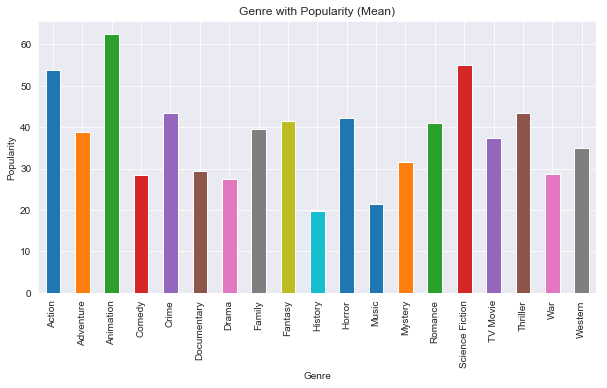

In [103]:
Groupby_plot('Genre', 'Popularity', 'Popularity', 'Genre with Popularity (Mean)')

> For the first question we can see that all movies mean popularity are almost the same except for three movies tends to be high over years, like Animation (Most), SciFi, Action. Which is good for filmmakers to know before they invest in movies.

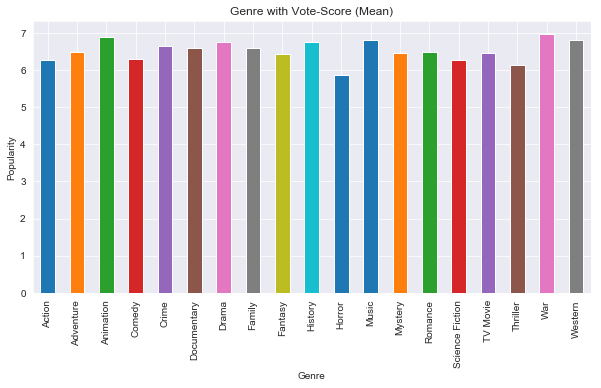

In [110]:
Groupby_plot('Genre', 'Vote_Average', 'Vote Score', 'Genre with Vote-Score (Mean)')

> For the second question about which genre got the most vote score, we got that no correlation for that, looks like evrey movies genre got the same average score about 6, but the only one hits 7 is War movies as it's so emotional for everyone which make a great chance to get high score.

- It's a fact which may be known for anyone and validated with the following figure that with years moving also the number of movies increases more and more with non-stop curve.

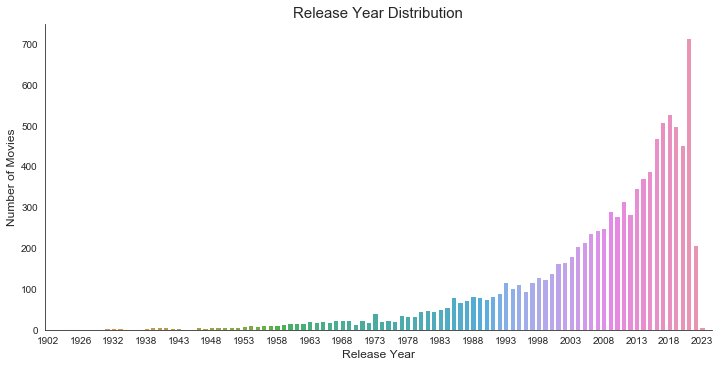

In [72]:
# Release year distribution using catplot, diffrent colors for diffrent frequncies.
with sns.axes_style('white'):
    g = sns.catplot(x = "release_year", data=movies_df, aspect=2,
                       kind="count")
    g.set_xticklabels(step=5)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.title('Release Year Distribution', fontsize=15)
    plt.show()

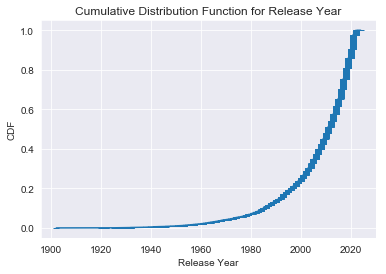

In [71]:
cdf(movies_df.release_year, 'Release Year', 'CDF', 'Cumulative Distribution Function for Release Year')

> From the above graph we can ensure what we assumed before about movies being increased year by year, at the begining for the curve the slope seemed to be not steep at all, but after 2000s about of 80 percent of the movies in the whole data exist. 

In [122]:
max_num_movies = movies_df.release_year.value_counts().max()
print('Max number of movies is ' + str(max_num_movies) + ' in the year of 2021 ')

Max number of movies is 714 in the year of 2021 


> So for question 3 Most number of movies is in 2021 with 714 movies exists

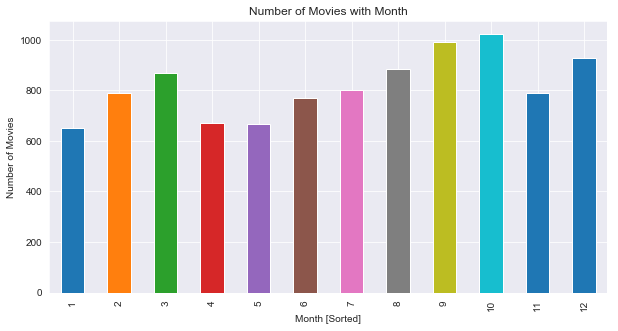

In [120]:
VC_ReleaseMonth = movies_df.release_month.value_counts().sort_index()  # Value counts for release month movies [Sorted]
VC_ReleaseMonth.plot(kind = 'bar',  figsize=(10, 5))
plt.xlabel('Month [Sorted]')
plt.ylabel('Number of Movies')
plt.title('Number of Movies with Month')
plt.show()

> Does the number of the films over the year are affected by the month? [It might be something between month 7 and 10].
Month 9 and 10 is the most, but which makes median is 7 and mean as well, as the month 1,4,5 is lower than average which makes 7 is the median.

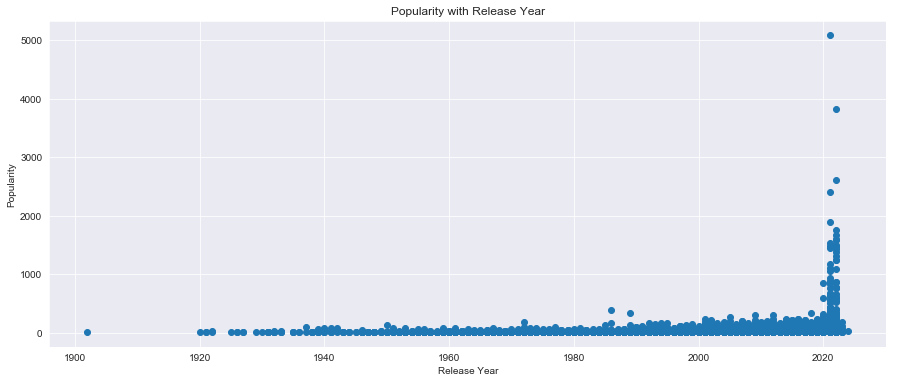

In [91]:
# Using Scatter plot function created to make it between year of release and poularity to check for any correlation
x = movies_df.release_year
y = movies_df.Popularity
xlabel = 'Release Year'
ylabel = 'Popularity'
title = 'Popularity with Release Year'
plot_scatter(x,y,xlabel,ylabel, title)

-  It seems like with the release year increasing the popularity inceases as well, for new years they have also low popularity movies but for new years it have mode value for popularity more than early days.
- For the curve above we cannot say explicitly with years moving popularity increased, but the extra popular not exists except after 2000s , which means that some movies shows make a great popularity above the average.

In [156]:
# Get the title of the most vote counts movies 
print('The most Vote counts Movies are ' + str(movies_df.sort_values(by = 'Vote_Count', ascending= False).Title[:5].values))

The most Vote counts Movies are ['Inception' 'Interstellar' 'The Dark Knight' 'The Avengers' 'Deadpool']


In [157]:
# Get the title of the most Popular movies 
print('The most Popular Movies are ' + str(movies_df.sort_values(by = 'Popularity', ascending= False).Title[:5].values))

The most Popular Movies are ['Spider-Man: No Way Home' 'The Batman' 'No Exit' 'Encanto'
 "The King's Man"]


> **5-** Which movies got the most number of views?  Question

> From the above two arrays we got that if we count most viewed with popularity and vote counts we got two diffrent arrays, and this indicates that with votecounts they are very high quality movies regardless the revenue, but with popularity quality doesnt matter, it seems revenue which makes the popularity term is high (so Most viewed movies as well).  

In [158]:
# Make a variables counts the movies per month and year
releaseMonth_movies = movies_df.release_month
releaseyear_movies = movies_df.release_year
releaseMonth_movies.median() # ReleaseMonth Median

7.0

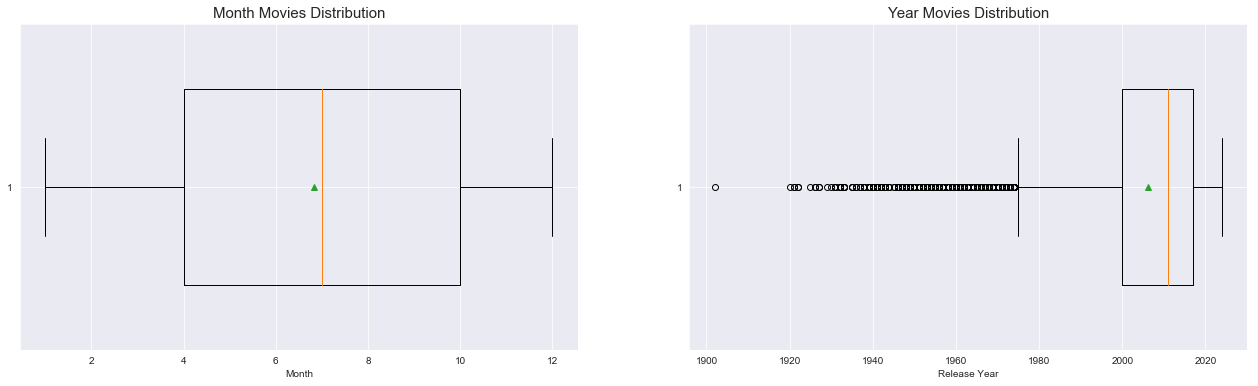

In [159]:
# The first figure shows the Month Movies 1-D Distribution and the second one shows the year Movies 1-D Distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
ax1.boxplot(releaseMonth_movies, vert= False, widths= 0.6, showmeans = True)
ax2.boxplot(releaseyear_movies, vert= False, widths= 0.6, showmeans = True)
ax1.set(xlabel = 'Month')
ax1.set_title('Month Movies Distribution', fontsize=15)
ax2.set(xlabel = 'Release Year')
ax2.set_title('Year Movies Distribution', fontsize=15)
plt.show()

> The Median and the mean for month containing movies is approximately equivalent equal to 7 thus  the distribution is symmetric, median does not conclude that month 7 is the most month containing movies but it's the center of our data, we already conclude before that month 10 and year of 2021 are the most already. For Year distribution the data is left skewed with alot of outliers as no old movies exists.

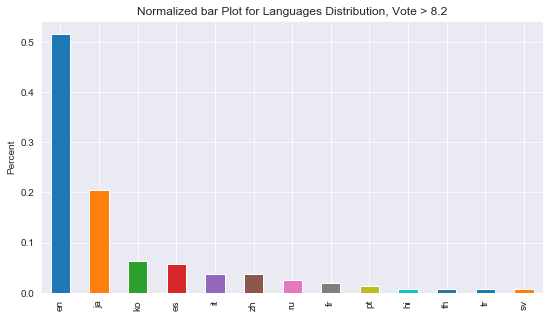

In [187]:
# Make boolean expression for high vote > 8.2 to eliminate some languages
high_vote = movies_df.Vote_Average > 8.2
# Select only language row with boolean expression vote > 8.2
Languages_high_vote = movies_df[high_vote]['Original_Language'].value_counts(normalize = True)
Languages_high_vote.plot(kind = 'bar', figsize=(9, 5))
plt.ylabel('Percent')
plt.title('Normalized bar Plot for Languages Distribution, Vote > 8.2')
plt.show()

> It's Logical that English movies will be the most movies exists, but according to total english movies exists with no filters. English Movies must be dominating. But for score above 8.2 there are another movies language that compete which is japanese and it seems that japanese movies gets a high score.

- We can ensure the above statement by value counting the total movies languages, English movies takes about 80 percent of the total movies but with score above 8 it takes only 50 percent of the movies. but japanese movies from total takes only 6 percent but with filtering only score above 8.2 it takes about 20 percent of the toal movies which a great intution.

In [192]:
# Calculating the percent of each language from the total movies exists
movies_df.Original_Language.value_counts(normalize = True)[0:5] # Only largest 5 movies

en    0.770327
ja    0.065635
es    0.034497
fr    0.029714
ko    0.017299
Name: Original_Language, dtype: float64

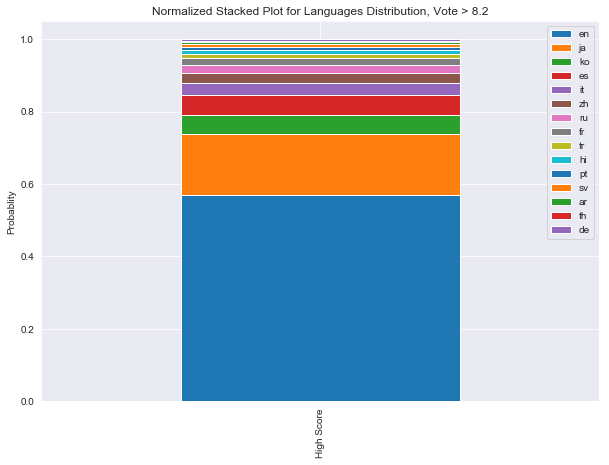

In [215]:
# Plotting only movies language (probabilty) above 8.2 score 
High_Score = movies_df.query('Vote_Average >= 8.2')['Original_Language'].value_counts(normalize = True)
data=pd.DataFrame([High_Score])
data.index=['High Score']
data.plot(kind='bar',stacked=True,figsize=(10,7))
plt.ylabel('Probablity')
plt.title('Normalized Stacked Plot for Languages Distribution, Vote > 8.2')
plt.show()

## Conclusions
> We tried to figure some insights for filmmakers and we found for example that Animation, SciFi, Actions, handles the most Popularity.

> Month 9 and 10 is the most, but which makes median is 7 and mean as well, as the month 1,4,5 is lower than average which makes 7 is the median.

> Interesting insight: Japanese movies gets the highest vote score besides English movies according to its number of movies, All of this might come from anime series which makes high score.

### Limitations:
> For Cleanness, thre is no limitations, except for only one datatype which is release date which must be converted into dattime datatype but we cannot consider it as a limitation.

> For the relationship curve between release year with popularity, we assumed that movies popularity will increase with year and the curve stated that also but not very much, the limitation here that the curve we got cannot explicitly state that the popularity increase with release year. But still no movies in old years got extra high popularities like these years which have some extra high popularity but it still nothing to figure from that.

> Name: Abdelrahman Ibrahim Karawia